# Iris Plant Classification
Jaime Avendaño  

This is an example of KNN Classification. The goal is to be able to determine the correct class of iris plant based on four distinguishing features.

### Dataset:
* Sepal Length - in cm
* Sepal Width - in cm
* Petal Length - in cm
* Petal Width - in cm

### Target:
* Species - 
 1. Iris Setosa
 2. Iris Versicolour
 3. Iris VIrginica

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

from janitor import clean_names
%matplotlib inline

In [88]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [89]:
iris = pd.read_csv('Course_Data\Iris.csv')
iris = iris.clean_names(case_type='snake')
iris.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [90]:
iris.shape

(150, 5)

# EDA

In [91]:
iris.species.value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: species, dtype: int64

<Figure size 1080x1080 with 0 Axes>

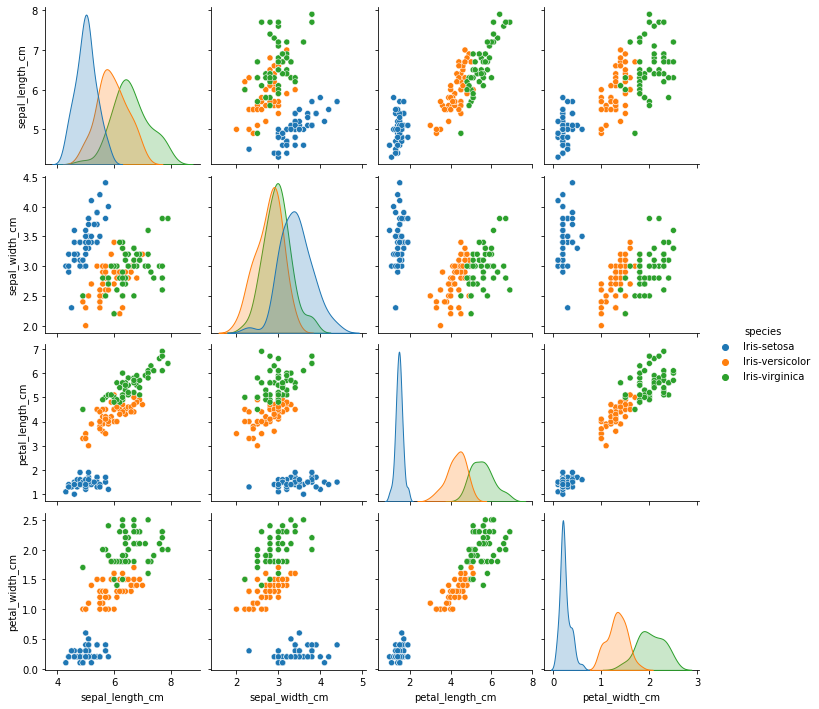

In [92]:
plt.figure(figsize=(15, 15))
sns.pairplot(iris, hue='species', 
             vars=['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm', 'petal_width_cm'])

<AxesSubplot:xlabel='species', ylabel='sepal_width_cm'>

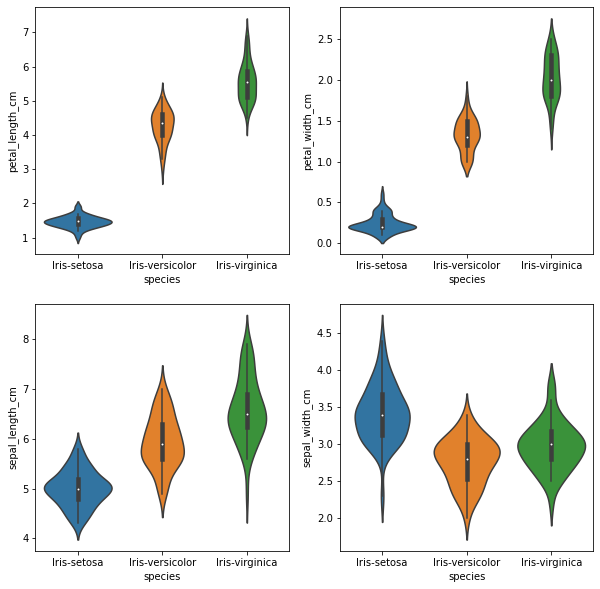

In [93]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
sns.violinplot(x='species', y='petal_length_cm', data=iris)

plt.subplot(2,2,2)
sns.violinplot(x='species', y='petal_width_cm', data=iris)

plt.subplot(2,2,3)
sns.violinplot(x='species', y='sepal_length_cm', data=iris)

plt.subplot(2,2,4)
sns.violinplot(x='species', y='sepal_width_cm', data=iris)

# Data Cleaning
  
1. Species - LabelEncoder 
2. MinMaxScaler on all features

In [94]:
train = iris.drop(columns=['species'])

In [95]:
label_enc = LabelEncoder()
y = label_enc.fit_transform(iris.species)
y[45:55]

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [96]:
scaler = MinMaxScaler()
num_features = train.columns

scaler.fit(train[num_features])
train_scaled = pd.DataFrame(scaler.transform(train[num_features]), columns=num_features)
X = train_scaled.values
X[:5]

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667]])

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training and Testing

In [98]:
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [99]:
y_pred = knn.predict(X_test)
y_pred[:10]

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1])

<AxesSubplot:>

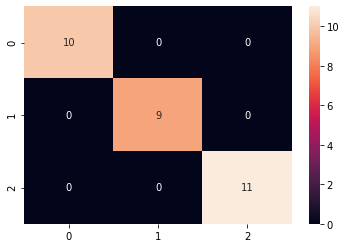

In [100]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')

In [101]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

